In [ ]:
from numpy import cos, exp, sin, pi, sign
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

a, b, alpha, beta = 1.1, 2.5, 2/5, 0
def f(x):
    return 0.5*cos(2*x)*exp(2*x/5) + 2.4*sin(1.5*x)*exp(-6*x) + 6*x

def p(x):
    return(x - a)**(-alpha)*(b - x)**(-beta)

def F(x):
    return p(x)*f(x)

def real_integral_value(a, b, f):
    return scipy.integrate.quad(f, a, b)

def kardano(coefficients):
    p1 = 1
    p2, p3, p4 = coefficients
    q = ((2 * p2**3 / (27 * p1**3)) - (p2 * p3 / (3 * p1**2)) + (p4 / p1)) / 2
    p = (3 * p1 * p3 - p2**2) / (9 * p1**2)
    D = q**2 + p**3
    if D >= 0:
        raise Exception("this equation has less than 3 roots")
    else:
        r = math.sqrt(abs(p))
        if sign(q) < 0:
            r *= -1
        phi = math.acos(q / r**3)
        x1 = -2 * r * cos(phi / 3) - p2 / (3 * p1)
        x2 = 2 * r * cos(pi / 3 - phi / 3) - p2 / (3 * p1)
        x3 = 2 * r * cos(pi / 3 + phi / 3) - p2 / (3 * p1)
    return [x1, x2, x3]

def mu(i, z1, z2):
    if i == 0:
        return ((z2 - a)**(1 - alpha) - (z1 - a)**(1 - alpha)) / (1 - alpha)
    if i == 1:
        return ((z2 - a)**(2 - alpha) - (z1 - a)**(2 - alpha)) / (2 - alpha) + a*mu(0, z1, z2)
    if i == 2:
        return ((z2 - a)**(3 - alpha) - (z1 - a)**(3 - alpha)) / (3 - alpha) + 2*a*mu(1, z1, z2) - a**2 * mu(0, z1, z2)
    if i == 3:
        return ((z2 - a)**(4 - alpha) - (z1 - a)**(4 - alpha)) / (4 - alpha) + 3*a*mu(2, z1, z2) - 3*a**2*mu(1, z1, z2) + a**3*mu(0, z1, z2)
    if i == 4:
        return ((z2 - a)**(5 - alpha) - (z1 - a)**(5 - alpha)) / (5 - alpha) + 4*a*mu(3, z1, z2) - 6*a**2*mu(2, z1, z2) + 4*a**3*mu(1, z1, z2) - a**4*mu(0, z1, z2)
    if i == 5:
        return ((z2 - a)**(6 - alpha) - (z1 - a)**(6 - alpha)) / (6 - alpha) + 5*a*mu(4, z1, z2) - 10*a**2*mu(3, z1, z2) + 10*a**3*mu(2, z1, z2) - 5*a**4*mu(1, z1, z2) + a**5*mu(0, z1, z2)

def gauss_find_nodes(a, b, n):
    mus = np.array([mu(i, a, b) for i in range(n*2)])
    M = np.array([[mus[j + s] for j in range(0, n)] for s in range(0, n)])
    m1 = [-1 * mus[n + s] for s in range(0, n)]
    coeffs = np.linalg.solve(M, m1)[::-1]
    nodes_gauss = kardano(coeffs)
    return nodes_gauss

def solve_integral_highest_alg_deg(f, a, b, nodes_num, nodes=None, method='newton kotes'):
    if nodes == None:
        nodes = np.linspace(a, b, nodes_num)
    ans = 0
    for l in range(1, len(nodes)):
        n = 3
        if method == 'newton kotes':
            interv = [nodes[l - 1], ((nodes[l - 1] + nodes[l]) / 2), nodes[l]]
        elif method == 'gauss':
            interv = gauss_find_nodes(nodes[l - 1], nodes[l], n)
            interv.sort()
        mus = np.array([mu(i, nodes[l - 1], nodes[l]) for i in range(n)]).transpose()
        A = np.vander(interv,increasing=True).transpose()
        coeffs = np.linalg.solve(A, mus)
        next_ans = sum([coeffs[i]*f(interv[i]) for i in range(n)])
        ans += next_ans
    return ans


# Часть 1. Квадратурные формулы (прямоугольники, трапеции, симпсон, ньютон-котес, гаусс)


1.1 Реализовать методы вычисления определенного интеграла с использованием
составных квадратурных формул: средних и левых прямоугольников, трапеции, Симпсона.
В весовую качестве функцию подынтегральной функции взять функцию $f(x)$ Вашего варианта (т.е. положить
$p(x) ≡ 1$):
$J(F) = \int^b_aF(x)dx = \int^b_af(x)dx$

In [ ]:
def left_rectangle(a, b, f):
    return (b - a) * f(a)

def middle_rectangle(a, b, f):
    return (b - a) * f((a+b)/2)

def right_rectangle(a, b, f):
    return (b - a) * f(b)

def trapezia(a, b, f):
    return (b - a)/2 *(f(a) + f(b))

def simpson(a, b, f):
    return (b - a)/6 *(f(a) + 4*f((a+b)/2) + f(b))

def solve_integral_kvad(formula=middle_rectangle, f=f, nodes_num=3, a=a, b=b):
    knods = np.linspace(a, b, nodes_num)
    result = 0
    for i in range(nodes_num - 1):
        result += formula(knods[i], knods[i+1], f)
    return result

In [ ]:
methods = {
           'left_rectangle' : left_rectangle,
           'middle_rectangle' : middle_rectangle,
           'right_rectangle' : right_rectangle,
           'trapezia' : trapezia,
           'simpson' : simpson
           }
nodes_nums = [2, 3, 4, 5, 7, 9, 15, 20, 50, 100, 300]

In [ ]:
table = pd.DataFrame(columns=['nodes_num', 'real value'] + list(methods.keys()) + ['newton-kotes', 'gauss'])
real_value = real_integral_value(a, b, f)[0]
for node in nodes_nums:
    table.loc[len(table.index)] = [node, real_value] + [solve_integral_kvad(methods[method], nodes_num=node) for method in methods.keys()] + [solve_integral_highest_alg_deg(f, a, b, node, method='newton kotes'), solve_integral_highest_alg_deg(f, a, b, node, method='gauss')]

In [ ]:
table

,nodes_num,real value,left_rectangle,middle_rectangle,right_rectangle,trapezia,simpson,newton-kotes,gauss
0,2.0,14.273141,8.604918,13.830398,21.539751,15.072334,14.244377,18.558041,18.602518
1,3.0,14.273141,11.217658,14.181767,17.685075,14.451366,14.271634,18.598331,18.602943
2,4.0,14.273141,12.195044,14.233855,16.506655,14.350849,14.272853,18.601806,18.602947
3,5.0,14.273141,12.699713,14.251293,15.933421,14.316567,14.273051,18.602530,18.602948
4,7.0,14.273141,13.214450,14.263509,15.370255,14.292352,14.273123,18.602848,18.602948
5,9.0,14.273141,13.475503,14.267738,15.092357,14.283930,14.273135,18.602912,18.602948
6,15.0,14.273141,13.814701,14.271381,14.738617,14.276659,14.273140,18.602943,18.602948
7,20.0,14.273141,13.934660,14.272186,14.615441,14.275050,14.273141,18.602946,18.602948
8,50.0,14.273141,14.141440,14.272997,14.405416,14.273428,14.273141,18.602948,18.602948
9,100.0,14.273141,14.207884,14.273106,14.338539,14.273211,14.273141,18.602948,18.602948


In [ ]:
plt.figure(figsize=(6,4))
plt.plot(np.linspace(a, b, 100), f(np.linspace(a, b, 100)))
plt.show()

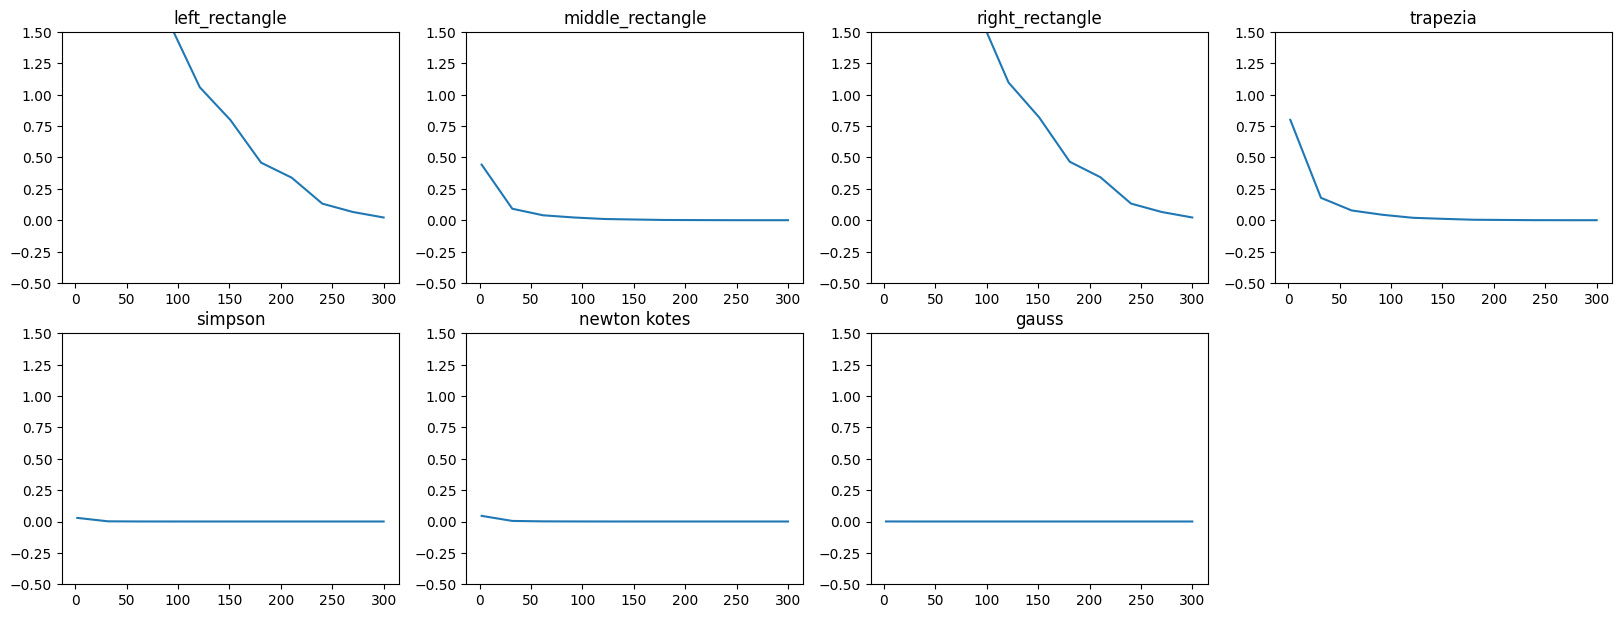

In [ ]:
figure = plt.figure(figsize=(20,15))
m=0
for method in methods.keys():
    m+=1
    error=[abs(real_value - solve_integral_kvad(methods[method], nodes_num=node))for node in nodes_nums]
    X = np.linspace(nodes_nums[0], nodes_nums[-1], len(nodes_nums))
    figure.add_subplot(4, 4, m)
    plt.plot(X, error)
    plt.ylim([-0.5, 1.5])
    plt.title(method)
for method in ['newton kotes', 'gauss']:
    m+=1
    error=[abs(real_integral_value(a, b, F)[0] - solve_integral_highest_alg_deg(f, a, b, node, method=method)) for node in nodes_nums]
    X = np.linspace(nodes_nums[0], nodes_nums[-1], len(nodes_nums))
    figure.add_subplot(4, 4, m)
    plt.plot(X, error)
    plt.ylim([-0.5, 1.5])
    plt.title(method)

# Часть 2. Методы оценки погрешности составных квадратурных формул

In [ ]:
eps = 10**(-6)

def S_i(f, a, b, nodes_num, nodes=None, method='newton kotes'):
    if nodes == None:
        nodes = np.linspace(a, b, nodes_num)
    ans = 0
    for l in range(1, len(nodes)):
        n = 3
        if method == 'newton kotes':
            interv = [nodes[l - 1], ((nodes[l - 1] + nodes[l]) / 2), nodes[l]]
        elif method == 'gauss':
            interv = gauss_find_nodes(nodes[l - 1], nodes[l], n)
            interv.sort()
        mus = np.array([mu(i, nodes[l - 1], nodes[l]) for i in range(n)]).transpose()
        A = np.vander(interv,increasing=True).transpose()
        coeffs = np.linalg.solve(A, mus)
        next_ans = sum([coeffs[i]*f(interv[i]) for i in range(n)])
        ans += next_ans
    return ans
R = 1
h = [0.5]
S = [S_i(f, a, b, int((b - a)/h[0]))]
while R > eps:
    h.append(h[-1]/2)
    S.append(S_i(f, a, b, int((b - a)/h[-1])))

